## Pyber Ride Sharing

### Analysis
<ul> 
<li> The average fare of rides in Rural cities is greater than the average fare of rides in Urban ones. </li>
<li> The driver count seems to be the greatest in Urban cities. </li>
<li> Suburban cities have more rides than Rural cities and fewer rides than Urban cities with only slightly cheaper fares on average than rural cities.  </li>


In [955]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.plotly as py


In [956]:
#Import data from csv 
city_details = 'city_data.csv'
city_df = pd.read_csv(city_details)

ride_details = 'ride_data.csv'
ride_df = pd.read_csv(ride_details)

#Merge the two dataframes
df_ride_city = ride_df.merge(city_df, how='outer', on="city")
df_ride_city.head()



,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [957]:
#Create DF for Avg Fare
avg_fare = pd.DataFrame(df_ride_city.groupby("city")["fare"].mean())
avg_fare.reset_index(inplace=True)
#Create DF for Total Rides
total_rides = pd.DataFrame(df_ride_city.groupby("city")["ride_id"].count())
total_rides.reset_index(inplace=True)
#Drop duplicates from city_df
new_city_df = city_df.drop_duplicates(subset=['city'])
new_city_df

#Merge all DFs 
city_analysis=avg_fare.merge(total_rides,how='outer',on='city')
city_analysis_final = city_analysis.merge(new_city_df,how='outer', on='city')
city_analysis_final.columns=["City","Avg Fare","Total Rides","Total Drivers","City Type"]
city_analysis_final.head()

,City,Avg Fare,Total Rides,Total Drivers,City Type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


### Bubble Plot of Ride Sharing Data

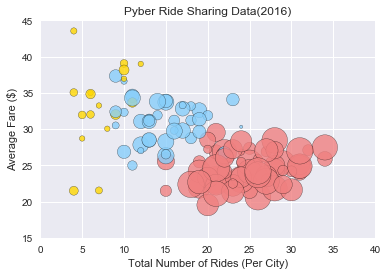

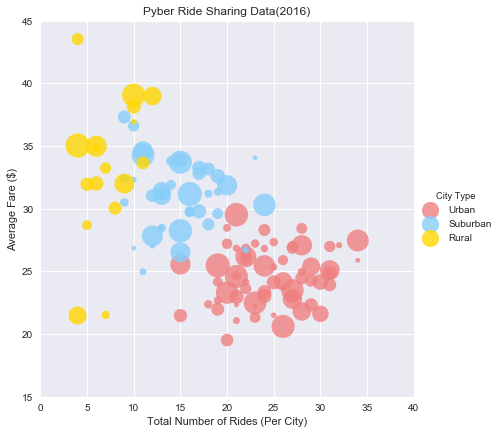

In [962]:
#Create Bubble Plot 
x_axis = city_analysis_final["Total Rides"]
y_axis = city_analysis_final["Avg Fare"]
size = city_analysis_final["Total Drivers"]
colors ="lightcoral", "lightskyblue","gold"
colormap={"Urban":"lightcoral", "Suburban":"lightskyblue", "Rural":"gold"}
colors = [colormap[x] for x in city_analysis_final["City Type"]]
 
labels =["Urban","Suburban","Rural"]
    
city_analysis_final.plot(kind ="scatter", x="Total Rides", y="Avg Fare", 
                         s=size*10, c=colors, alpha=0.8, edgecolor="black")

plt.xlim(0,40)
plt.ylim(15,45)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data(2016)")
sns.set_style("darkgrid")

 
ax = sns.lmplot(x="Total Rides", y="Avg Fare", data=city_analysis_final,
          fit_reg=False, hue="City Type", legend = True,size = 6, scatter_kws={"s":(size*8)},
          palette=dict(Urban="lightcoral", Suburban="lightskyblue", Rural="gold"))
plt.xlim(0,40)
plt.ylim(15,45)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data(2016)")
sns.set_style("darkgrid")



plt.show()
#couldn't figure out how to include the legend 
#in the first scatterplot figure and couldn't 
#figure out how to give edgecolors in the second figure

In [929]:
#Create DataFrame for Total Rides by City Type
city_group = pd.DataFrame(df_ride_city["type"].value_counts())
city_group.reset_index(inplace=True)
city_group.columns = ["City Type", "Total Rides"]



In [598]:
#Create DateFrame for Driver Count by City Type
clean_ride_city = df_ride_city.drop_duplicates(subset=['city'])
clean_ride_city = pd.DataFrame(clean_ride_city.groupby("type")["driver_count"].sum())
clean_ride_city.reset_index(inplace=True)
clean_ride_city.columns=["City Type","Driver Count"]




In [599]:
#Create DataFrame for Fare by City Type
type_fare = pd.DataFrame(df_ride_city.groupby("type")["fare"].sum())
type_fare.reset_index(inplace=True)
type_fare.columns=["City Type","Fare"]


In [600]:
#Merge all 3 DataFrames by City Type into one 
by_city_type = city_group.merge(clean_ride_city, how='outer', on="City Type")
city_type_analysis = by_city_type.merge(type_fare, how='outer', on = "City Type")


### Total Fares by City Type

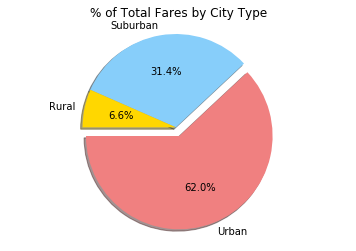

In [601]:
#Pie Chart for Total Fares 
explode = (0.1,0,0)
colors = "lightcoral","lightskyblue","gold"
plt.pie(city_type_analysis["Fare"], labels = city_type_analysis["City Type"], explode=explode, 
        colors = colors, autopct="%1.1f%%", shadow = True, startangle = 180)
plt.title("% of Total Fares by City Type")
plt.axis('equal')
plt.show()

### Total Rides by City Type 

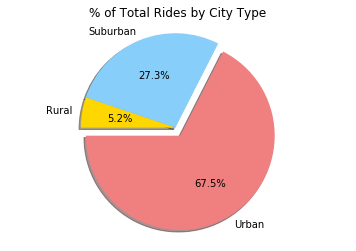

In [602]:
#Pie Chart for Total Rides
explode = (0.1,0,0)
colors = "lightcoral","lightskyblue","gold"
plt.pie(city_type_analysis["Total Rides"], labels = city_type_analysis["City Type"], explode=explode, 
        colors = colors, autopct="%1.1f%%", shadow = True, startangle = 180)
plt.title("% of Total Rides by City Type")
plt.axis('equal')
plt.show()

### Total Drivers by City Type

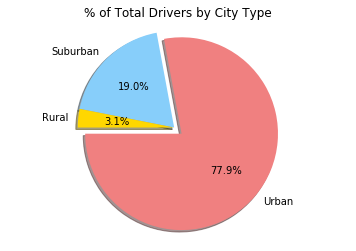

In [603]:
#Pie Chart for Total Drivers 
explode = (0.1,0,0)
colors = "lightcoral","lightskyblue","gold"
plt.pie(city_type_analysis["Driver Count"], labels = city_type_analysis["City Type"], explode=explode, 
        colors = colors, autopct="%1.1f%%", shadow = True, startangle = 180)
plt.title("% of Total Drivers by City Type")
plt.axis('equal')
plt.show()
